In [51]:
# Importing some python libraries.
import numpy as np
from numpy.random import randn,rand
import matplotlib.pyplot as pl

from matplotlib.pyplot import plot

import seaborn as sns
%matplotlib inline

# Fixing figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 10,5



sns.set_palette('Reds')

# Reaction Network Homework

In this homework, we will study a very simple set of reactions by modelling it through three different ways. First, we shall employ an ODE model called the **Reaction Rate Equation**.  Then, we will solve the **Chemical Langevin Equation** and, finally, we will simulate the exact model by "solving" the **Chemical  Master Equation**. 

The reaction network of choice shall be : 



# Chemical Langevin Equation

Next, we will model the system by using the CLE. For our particular birth/death process, this will be 

$$
dX_t=(a-\mu\cdot X_t)dt+(\sqrt{a}-\sqrt{\mu\cdot X_t})dW.
$$

To solve this, we shall use the Euler-Maruyama scheme from the previous homework. We fix a $\Delta t$ positive. Then, the scheme shall be : 

$$
X_{n+1}=X_n+(a-\mu\cdot X_n)\Delta t+(\sqrt{a}-\sqrt{\mu\cdot X_t})\cdot \sqrt{\Delta t}\cdot z,\ z\sim N(0,1).
$$

In [2]:
def EM(xinit,T,Dt=0.1,a=1,mu=2):
    '''
        Returns the solution of the CLE with parameters a, mu
        
        Arguments
        =========
        xinit : real, initial condition.
        Dt    : real, stepsize of the Euler-Maruyama.
        T     : real, final time to reach.
        a     : real, parameter of the RHS. 
        mu    : real, parameter of the RHS.
    
    '''
    
    n = int(T/Dt) # number of steps to reach T
    X = np.zeros(n)
    z = randn(n)
    
    X[0] = xinit # Initial condition
    
    # EM method 
    for i in xrange(1,n):
        X[i] = X[i-1] + Dt* (a-mu*X[i-1])+(np.sqrt(a)-np.sqrt(mu*X[i-1]))*np.sqrt(Dt)*z[i]
        
    return X
        

Similarly to the previous case, here is a run with multiple initial conditions. 

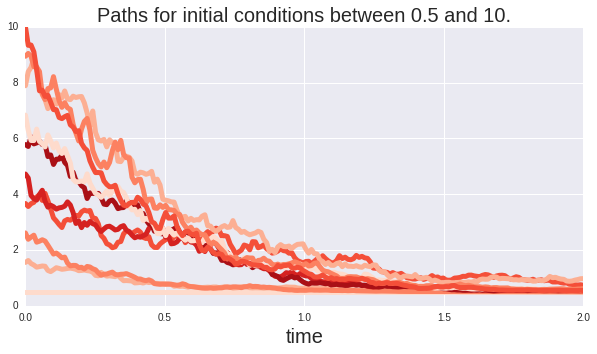

In [24]:
T = 2
Dt = 0.01
def plotPaths(T,Dt):
    n = int(T/Dt)
    t = np.linspace(0,T,n)

    xinitlist = np.linspace(0.5,10,10)

    for x0 in xinitlist : 
        path = EM(xinit=x0,T=T,Dt=Dt,a=1,mu=2.0)
        pl.plot(t, path,linewidth=5)

    pl.xlabel('time', fontsize=20)
    pl.title('Paths for initial conditions between 0.5 and 10.', fontsize=20)
    
plotPaths(T,Dt)

We notice that the paths decay towards 0.5. 

## Chemical Master Equation

Finally, we shall simulate the system exactly by using the Stochastic Simulation Algorithm (SSA). 

In [61]:
def SSA(xinit, nsteps, a=1, mu=2.0):
    '''
        Using SSA to exactly simulate the death/birth process starting
        from xinit and for nsteps. 
        
        a and mu are parameters of the propensities.
        
        Returns
        =======
        path : array-like, the path generated. 
        tpath: stochastic time steps
    '''
    
   
    path = np.zeros(nsteps)
    tpath= np.zeros(nsteps)
    
    path[0] = xinit # initial population
    
    u = rand(2,nsteps) # pre-pick all the uniform variates we need
    
    for i in xrange(nsteps):
        
        # The propensities will be normalized
        tot_prop = path[i-1]*mu+a
        
        prob = path[i-1]*mu/tot_prop # probability of death 
        
        if(u[0,i]<prob):
            # Death 
            path[i] = path[i]-1 
        else:
            # Birth
            path[i] = path[i]+1
            
        # Time stayed at current state    
        tpath[i] = np.log(1/u[1,i])*1/tot_prop
    
    tpath = np.cumsum(tpath)
    print 'Reached time T = ', sum(tpath)
    return path, tpath  

Reached time T =  5.80781452287


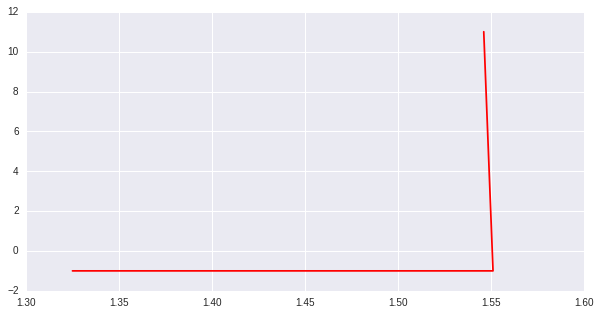

In [64]:
path, tpath = SSA(10,4)

plot(tpath,path,color='red')


In [63]:
tpath

array([ 1.09461061,  1.11728208, -0.00708634, -0.02600881])